<a href="https://colab.research.google.com/github/Machine-Learning-for-Finance/Machine-Learning-Algorithms/blob/master/01-Data%20Loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt

# Loading From Google Drive

In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    base_location = "/content/drive/My Drive/data/"
except:
    base_location = "/data/FannieMae/"

In [3]:
!ls /content/drive/My\ Drive/data/2010Q1

ls: cannot access '/content/drive/My Drive/data/2010Q1': No such file or directory


# Financial Datasets

There are a large number of financial datasets that are available, the first one we will discuss is the Fannie Mae Fixed Rate Mortgage Dataset.

- https://www.fanniemae.com/portal/funding-the-market/data/loan-performance-data.html

- https://loanperformancedata.fanniemae.com/lppub/index.html#Portfolio

Which consists of both Acquisitions and Performance data for a collection of mortgages.

To make our lives a bit easier here are the column names pulled from the provided `R` script to load the data.  See `R` is good for at least one thing.

In [4]:
AcquisitionColumnNames = (
    "LOAN_ID", "ORIG_CHN", "Seller.Name", 
    "ORIG_RT", "ORIG_AMT", "ORIG_TRM", "ORIG_DTE",
    "FRST_DTE", "OLTV", "OCLTV", "NUM_BO", 
    "DTI", "CSCORE_B", "FTHB_FLG", "PURPOSE", 
    "PROP_TYP", "NUM_UNIT", "OCC_STAT", "STATE", "ZIP_3", 
    "MI_PCT", "Product.Type", "CSCORE_C", "MI_TYPE", 
    "RELOCATION_FLG"
)

PerformanceColumnNames = (
    "LOAN_ID", "Monthly.Rpt.Prd", "Servicer.Name", 
    "LAST_RT", "LAST_UPB", "Loan.Age", "Months.To.Legal.Mat", 
    "Adj.Month.To.Mat", "Maturity.Date", "MSA", 
    "Delq.Status", "MOD_FLAG", "Zero.Bal.Code", 
    "ZB_DTE", "LPI_DTE", "FCC_DTE","DISP_DT", 
    "FCC_COST", "PP_COST", "AR_COST", "IE_COST", 
    "TAX_COST", "NS_PROCS","CE_PROCS", "RMW_PROCS", 
    "O_PROCS", "NON_INT_UPB", "PRIN_FORG_UPB_FHFA", 
    "REPCH_FLAG", "PRIN_FORG_UPB_OTH", "TRANSFER_FLG"
)

In [5]:
# Data path will change depending on your system setup.

acquisition_data_path = f"{base_location}2010Q1/Acquisition_2010Q1.txt"

#### Loading the Acquisition Data from CSV

To load the data we call from `pandas`, `pd.read_csv` which automatically handles loading data from the csv file.  We provide column names, a notification that the file doesn't include headers, and information on what the column separator is `|` in this case.

In [6]:
acquisition_df = pd.read_csv(
    acquisition_data_path,
    names=AcquisitionColumnNames,
    header=None,
    sep="|"
)

In [7]:
acquisition_df.columns

Index(['LOAN_ID', 'ORIG_CHN', 'Seller.Name', 'ORIG_RT', 'ORIG_AMT', 'ORIG_TRM',
       'ORIG_DTE', 'FRST_DTE', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B',
       'FTHB_FLG', 'PURPOSE', 'PROP_TYP', 'NUM_UNIT', 'OCC_STAT', 'STATE',
       'ZIP_3', 'MI_PCT', 'Product.Type', 'CSCORE_C', 'MI_TYPE',
       'RELOCATION_FLG'],
      dtype='object')

#### Loading the Performance Data

In [8]:
performance_data_path = f"{base_location}2010Q1/Performance_2010Q1.txt"

performance_df = pd.read_csv(
    performance_data_path,
    names=PerformanceColumnNames,
    header=None,
    sep="|"
)

/home/capcolabs/Stevens/Machine-Learning-Algorithms/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


First thing we note is that this takes longer than the `Acquisitions` data to load, stemming from the fact that for each loan there are multiple monthly data elements loaded.

# Data Modifying

In [9]:
DS = set(performance_df['Delq.Status'])

In [10]:
print(DS)
mapper = {}
for ds in DS:
    try:
        mapper[ds] = int(ds)
    except:
        mapper[ds] = -1

performance_df['Delq.Status'] = performance_df['Delq.Status'].map(mapper)

{nan, '20', '82', '9', '40', '53', '12', '51', '90', '17', '91', '85', '32', '22', '54', '6', '37', '64', '96', '78', '76', '30', '49', '41', '62', '43', '59', '1', '8', '31', '45', '94', '68', '65', '74', '46', '69', '4', '89', '71', '57', '66', '99', '7', '50', '92', '25', '87', '88', '56', '95', '28', '47', '5', '79', '11', '60', '23', '86', '14', '61', '38', '84', '48', '15', '77', '70', 'X', '93', '58', '2', '67', '80', '16', '29', '83', '13', '34', '44', '33', '63', '98', '19', '73', '36', '39', '97', '3', '52', '18', '21', '27', '0', '10', '26', '72', '75', '35', '42', '55', '24', '81'}


In [11]:
V, C = np.unique(performance_df['Delq.Status'], return_counts=True)
print(V)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94
 95 96 97 98 99]


# Grouping By Loan ID

https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby

In [12]:
loans = performance_df.groupby("LOAN_ID", sort=True)['Delq.Status'].max()

ID_To_Delinq = {}

for row in loans.iteritems():
    loan_id, delinq = row
    ID_To_Delinq[loan_id] = delinq

In [13]:
def mapper(row):
    return ID_To_Delinq.get(row["LOAN_ID"], -1)

acquisition_df['MAX_DELINQ'] = acquisition_df.apply(mapper, axis=1)

In [14]:
V, C = np.unique(acquisition_df['MAX_DELINQ'], return_counts=True)

## Getting Delinquency Status

In [15]:
V, C = np.unique(
    performance_df['Monthly.Rpt.Prd'], 
    return_counts=True
)

In [16]:
actual_date = performance_df['Monthly.Rpt.Prd'] == "01/01/2015"
next_date   = performance_df['Monthly.Rpt.Prd'] == "01/01/2016"

date_df = performance_df[actual_date]
next_df = performance_df[next_date]

Delinquency = {}
Next_Delinquency = {}

for row in date_df.iterrows():
    row = row[1]
    Delinquency[row['LOAN_ID']] = ID_To_Delinq.get(row["LOAN_ID"], -1)
    
for row in next_df.iterrows():
    row = row[1]
    Next_Delinquency[row['LOAN_ID']] = ID_To_Delinq.get(row['LOAN_ID'], -1)

In [17]:
def mapper(row):
    return Delinquency.get(row["LOAN_ID"], -1)

def next_mapper(row):
    return Next_Delinquency.get(row['LOAN_ID'], -1)

acquisition_df['DELINQ_DATE'] = acquisition_df.apply(mapper, axis=1)

acquisition_df['DELINQ_NEXT'] = acquisition_df.apply(next_mapper, axis=1 )

In [18]:
delinq = acquisition_df['DELINQ_DATE'] > 0
delinq_df = acquisition_df[delinq]

print(f"{len(delinq_df.index)}")

def check_date_range(row):
    return row['DELINQ_NEXT'] >= row['DELINQ_DATE']

delinq_df['DELINQ_DELTA'] = delinq_df.apply(
    check_date_range,
    axis=1
)

20303


/home/capcolabs/Stevens/Machine-Learning-Algorithms/venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [19]:
V, C = np.unique(delinq_df['DELINQ_DELTA'], return_counts=True)

for v, c in zip(V, C):
    print(v, " | ", c)

False  |  2219
True  |  18084


In [20]:
df = delinq_df

DEL_NOTNAN = df["DELINQ_DELTA"].notna()
df = df[DEL_NOTNAN]
OLTV = df['OLTV'].notna()
df = df[OLTV]
CS = df['CSCORE_B'].notna()
df = df[CS]
DTI = df['DTI'].notna()
df = df[DTI]

credit_score  = np.array(df['CSCORE_B'])
loan_to_value = np.array(df['OLTV'])
debt_to_income= np.array(df['DTI'])

max_delinq    = np.array(df['DELINQ_DELTA'])

X = np.array([credit_score, loan_to_value, debt_to_income]).transpose()
y = np.array([max_delinq]).transpose()
print(X.shape)
print(y.shape)

Total = np.hstack([X, y])
print(Total.shape)
np.random.shuffle(Total)

X = Total[:, :3]
y = Total[:, 3:]

print(X.shape)
print(y.shape)

prop = 0.9
train_num = int(prop * len(Total))
print(f"Train Number: {train_num}")

X_train, X_test = X[:train_num], X[train_num:]
y_train, y_test = y[:train_num], y[train_num:]

print(f"X_Train: {X_train.shape}")
print(f"X_Test: {X_test.shape}")
print("=="*10)
print(f"y_Train: {y_train.shape}")
print(f"y_Test:  {y_test.shape}")

class_weight = {0: 18084/20303, 1: 1-(18084/20303) }

(20038, 3)
(20038, 1)
(20038, 4)
(20038, 3)
(20038, 1)
Train Number: 18034
X_Train: (18034, 3)
X_Test: (2004, 3)
y_Train: (18034, 1)
y_Test:  (2004, 1)


In [21]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(class_weight=class_weight)
clf = clf.fit(
    X_train, y_train
)
print(clf.score(X_test, y_test))
print(clf.feature_importances_)

0.8198602794411177
[0.44495036 0.23592247 0.31912716]


In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    n_estimators=10,
    class_weight=class_weight
)
rfc = rfc.fit(
    X_train, y_train
)
print(rfc.score(X_test, y_test))
print(rfc.feature_importances_)

/home/capcolabs/Stevens/Machine-Learning-Algorithms/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8597804391217565
[0.49598543 0.22031612 0.28369844]


# Neural Network Example

In [23]:
import tensorflow as tf

In [24]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset  = tf.data.Dataset.from_tensor_slices((X_test, y_test))

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100
V = np.unique(y)

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset  = test_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

print(train_dataset)

<BatchDataset shapes: ((None, 3), (None, 1)), types: (tf.float64, tf.float64)>


In [65]:
print(len(V))

print(class_weight)

2
{0: 4, 1: 0.05}


In [91]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=[3]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)


In [95]:
history = model.fit(
    train_dataset, 
    validation_data=test_dataset,
    class_weight=class_weight,
    epochs=30
)

Epoch 1/30
282/282 [==============================] - 1s 3ms/step - loss: 0.7372 - accuracy: 0.8232 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/30
282/282 [==============================] - 1s 2ms/step - loss: 0.6440 - accuracy: 0.8397 - val_loss: 0.6634 - val_accuracy: 0.9012
Epoch 3/30
282/282 [==============================] - 1s 2ms/step - loss: 0.5400 - accuracy: 0.8651 - val_loss: 0.3792 - val_accuracy: 0.9012
Epoch 4/30
282/282 [==============================] - 1s 2ms/step - loss: 0.4636 - accuracy: 0.8736 - val_loss: 0.4332 - val_accuracy: 0.9012
Epoch 5/30
282/282 [==============================] - 1s 2ms/step - loss: 0.5248 - accuracy: 0.8620 - val_loss: 0.4516 - val_accuracy: 0.9012
Epoch 6/30
282/282 [==============================] - 1s 2ms/step - loss: 0.5586 - accuracy: 0.8624 - val_loss: 0.3270 - val_accuracy: 0.9012
Epoch 7/30
282/282 [==============================] - 1s 2ms/step - loss: 0.4441 - accuracy: 0.8734 - val_loss: 0.3277 - val_accuracy: 0.901

In [96]:
print(history.history)

{'loss': [0.7373461579885162, 0.6442333675216145, 0.5403325284242604, 0.46331189921667193, 0.5245170105193742, 0.5579284270507501, 0.44400610130007995, 0.48420249224634543, 0.48670236761545915, 0.5162675693173412, 0.4195158157331975, 0.43911046404472087, 0.4840724185147147, 0.4644472644045359, 0.46134061897040285, 0.42387662639080637, 0.432720099014256, 0.43987407023763664, 0.4022568725020576, 0.409332186119168, 0.416469727458057, 0.39857471211331774, 0.3948123280107281, 0.4077153258588344, 0.42877881419133806, 0.3847116205774787, 0.38076295472373317, 0.39982817531808645, 0.38454588863317385, 0.42812433143115247], 'accuracy': [0.8231673, 0.83974713, 0.8651436, 0.8735722, 0.8620384, 0.8624265, 0.8734058, 0.8613175, 0.85860044, 0.8573251, 0.88066983, 0.8724631, 0.8571587, 0.8724631, 0.86786073, 0.8712432, 0.8735167, 0.8778973, 0.88943106, 0.88349783, 0.88066983, 0.8847732, 0.8893756, 0.8783964, 0.8761783, 0.8888211, 0.8892647, 0.8892093, 0.88493955, 0.8793945], 'val_loss': [0.46743614459

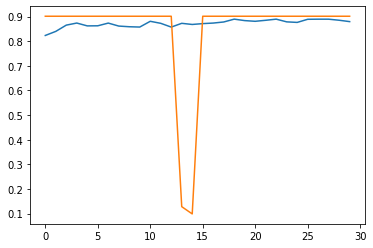

In [97]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

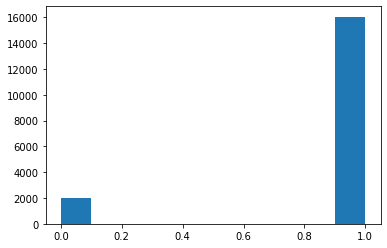

In [84]:
X = plt.hist(y_train)
plt.show(X)

In [87]:
pred = model.predict_classes(X_test)

CM = [[0,0],[0,0]]

for idx, p in enumerate(pred):
    actual = y_test[idx]
    CM[int(p)][int(actual)] += 1

In [88]:
import seaborn as sn

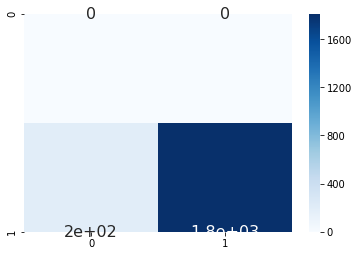

In [89]:
sn.heatmap(
    CM, 
    cmap="Blues", 
    annot=True,
    annot_kws={"size": 16}
)# font size